# Greedy heuristics

## Description of the problem
We are given three columns of integers with a row for each node. The first two columns contain x and y coordinates of the node positions in a plane. The third column contains node costs. The goal is to select exactly 50% of the nodes (if the number of nodes is odd we round the number of nodes to
be selected up) and form a Hamiltonian cycle (closed path) through this set of nodes such that the sum of the total length of the path plus the total cost of the selected nodes is minimized. 

The distances between nodes are calculated as Euclidean distances rounded mathematically to integer values. The distance matrix should be calculated just after reading an instance and then only the distance matrix (no nodes coordinates) should be accessed by optimization methods to allow
instances defined only by distance matrices.

## Pseudocode for all implemented algorithms
### Random solution
```python
choose randomly without replacement 0.5 * n numbers from 0 to n
```

### Nearest neighbor considering adding the node only at the end of the current path (NNHead)
The program needs the following arguments:
- D - distance matrix (after adding weights to corresponding columns), loops are set to be inifinites 
- starting - first node from which we continue solution
At the end of the program solution is in the variable: sol

#### Pseudocode
```python
current = starting
sol = [starting]
V = {starting}
iterate 0.5 * len(D) - 1 times
    nn = argmin {D[current][x] where x not in V}
    sol.append(nn)
    add nn to V
    current = nn
```

### Nearest neighbor considering adding the node at all possible position, i.e. at the end, at the beginning, or at any place inside the current path (NNWhole)
#### Pseudocode
```python
current = starting
sol = [starting]
NV = {starting}
iterate 0.5 * len(D) - 1 times
    best_dist = inf
    for j from 0 to len(solution) do
        nn = argmin {D[solution[j]][x] where x not in V}
        dist = D[solution[j]][nn]
        if dist < best_dist do
            best_dist = dist
            best_posj = j
            best_nn = nn
    insert best_nn to solution at position best_posi
    add n to V
```
### Greedy cycle
#### Pseudocode
```python
current = starting
sol = [starting]
V = {starting}
iterate 0.5 * len(D) - 1 times
    best_delta = inf
    for i from 0 to len(solution) - 1 do
        for j in NV:
            delta = D[sol[i], j] + D[j, sol[i+1]] - D[sol[i], sol[i + 1]] 
            if delta < best_delta do
                best_i = i
                best_j = j
                best_delta = delta
    insert best_j to solution at position best_i
    remove best_j from NV
```

## Results of a computational experiment: for each instance and method min, max and average value of the objective function.

In [12]:
import pandas as pd
df = pd.read_csv('../results/assignment2.csv', sep=";")
grouped = df.groupby(['filename', 'solver'])
best_results = grouped['score'].agg(['min', 'max', 'mean'])
best_results

min       max       mean
filename solver                                                  
TSPA.csv GreedyCycle                 71488.0   74119.0   72631.20
         NNHead                      84010.0   88080.0   85258.30
         NNWhole                     74241.0   77248.0   75745.20
         RandomSolver               253391.0  267905.0  263255.75
         RegretGreedyCycle          112034.0  121530.0  115744.35
         WeightedRegretGreedyCycle   70995.0   72801.0   71977.55
TSPB.csv GreedyCycle                 49394.0   57324.0   51436.50
         NNHead                      52319.0   55937.0   54358.85
         NNWhole                     51713.0   60218.0   56346.30
         RandomSolver               202772.0  229610.0  217256.65
         RegretGreedyCycle           69462.0   76905.0   72930.60
         WeightedRegretGreedyCycle   46752.0   51716.0   49819.00

## 2D visualization of the best solution for each instance and method. Cost of nodes should be presented e.g. by a color, greyscale, or size.

In [17]:
from tsp import TSP
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 8]

best = df.loc[grouped['score'].idxmin()]
best

,filename,solver,score,starting_node,solution
60,TSPA.csv,GreedyCycle,71488.0,0,"[0,46,68,139,193,41,115,5,42,181,159,69,108,18..."
29,TSPA.csv,NNHead,84010.0,9,"[9,62,49,144,14,106,185,40,165,90,81,78,145,12..."
40,TSPA.csv,NNWhole,74241.0,0,"[0,117,143,183,89,186,23,137,63,94,124,152,97,..."
3,TSPA.csv,RandomSolver,253391.0,-1,"[164,95,116,128,31,170,194,160,103,123,37,162,..."
93,TSPA.csv,RegretGreedyCycle,112034.0,13,"[199,69,108,67,36,140,93,117,143,0,46,198,115,..."
116,TSPA.csv,WeightedRegretGreedyCycle,70995.0,16,"[199,22,146,159,193,41,115,5,42,181,34,160,48,..."
185,TSPB.csv,GreedyCycle,49394.0,5,"[5,177,25,104,138,182,139,168,195,145,15,3,70,..."
156,TSPB.csv,NNHead,52319.0,16,"[16,1,117,31,54,193,190,80,175,5,177,36,61,141..."
164,TSPB.csv,NNWhole,51713.0,4,"[4,149,28,20,60,148,47,154,94,66,57,179,185,95..."
127,TSPB.csv,RandomSolver,202772.0,-1,"[164,95,116,128,31,170,194,160,103,123,37,162,..."


In [14]:
instance_a = TSP.from_csv('../data/TSPA.csv')
instance_b = TSP.from_csv('../data/TSPB.csv')

## The best solutions for each instance and method presented as a list of nodes indices (starting from 0).

In [15]:
def rotate_to_zero(solution):
    try:
        zeroi = solution.index(0)
        return solution[zeroi:] + solution[:zeroi] 
    except:
        return solution


### Results

TSPA.csv
GreedyCycle
[0, 46, 68, 139, 193, 41, 115, 5, 42, 181, 159, 69, 108, 18, 22, 146, 34, 160, 48, 54, 30, 177, 10, 190, 4, 112, 84, 35, 184, 43, 116, 65, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 180, 154, 53, 100, 26, 86, 75, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 57, 52, 185, 119, 40, 196, 81, 90, 165, 106, 178, 14, 144, 62, 9, 148, 102, 49, 55, 129, 120, 2, 101, 1, 97, 152, 124, 94, 63, 79, 80, 176, 137, 23, 186, 89, 183, 143, 117]


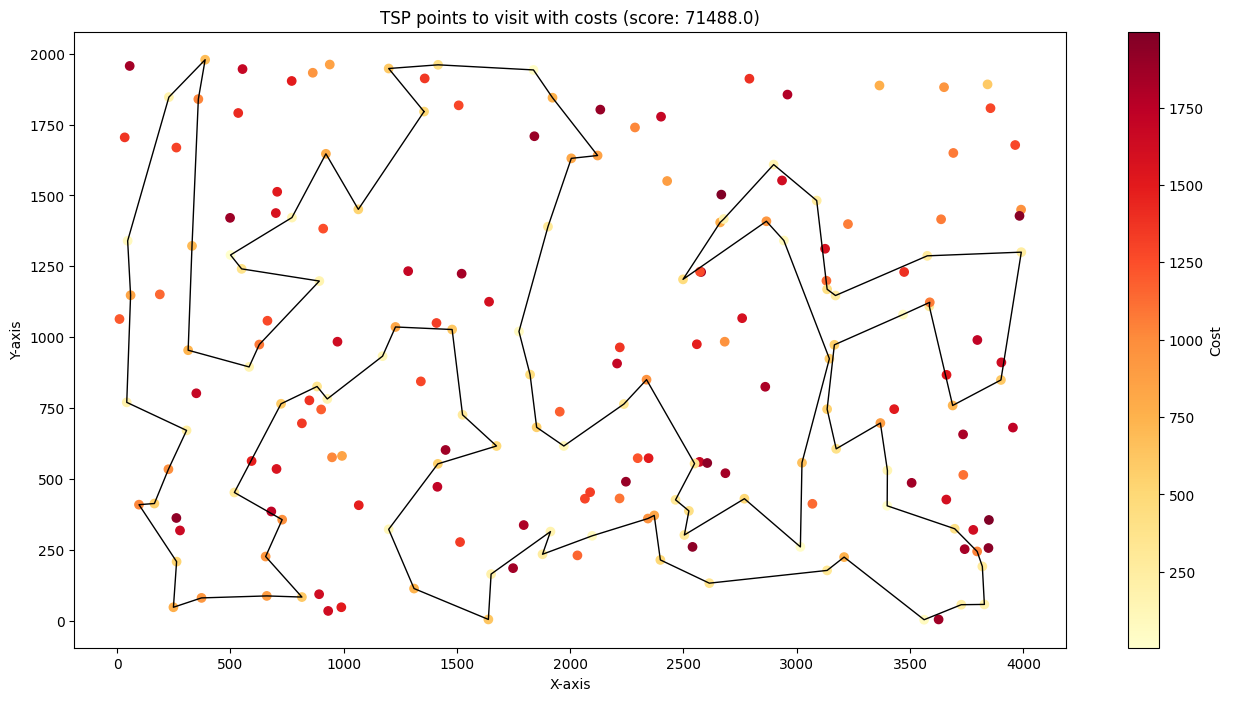

TSPA.csv
NNHead
[0, 117, 46, 68, 93, 140, 36, 163, 199, 146, 195, 103, 5, 96, 118, 51, 162, 127, 70, 112, 4, 84, 35, 149, 131, 47, 105, 9, 62, 49, 144, 14, 106, 185, 40, 165, 90, 81, 78, 145, 120, 44, 16, 171, 175, 113, 31, 92, 57, 55, 52, 178, 148, 176, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 133, 80, 79, 94, 97, 101, 1, 152, 2, 75, 86, 26, 100, 121, 137, 183, 143]


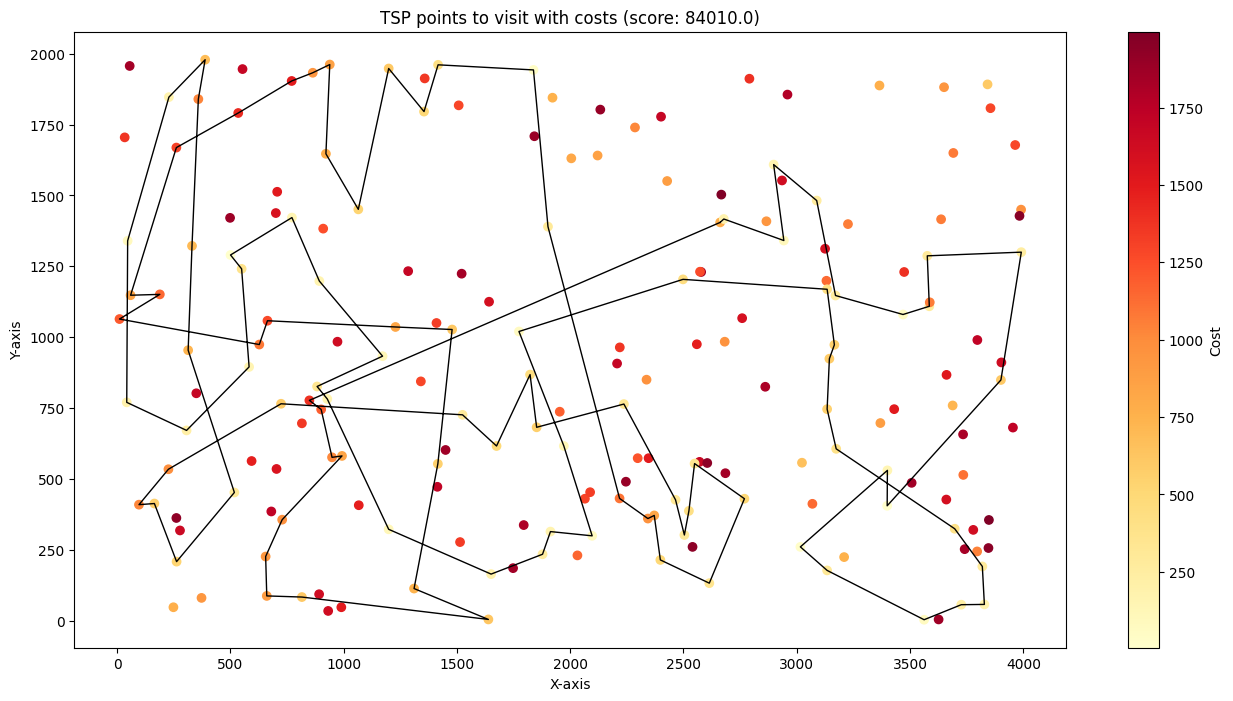

TSPA.csv
NNWhole
[0, 117, 143, 183, 89, 186, 23, 137, 63, 94, 124, 152, 97, 1, 75, 2, 129, 82, 44, 25, 16, 171, 175, 113, 56, 31, 78, 92, 57, 55, 52, 3, 138, 14, 144, 102, 62, 9, 148, 49, 106, 178, 185, 165, 90, 40, 119, 81, 196, 179, 145, 120, 101, 86, 26, 100, 53, 154, 180, 135, 70, 127, 123, 65, 116, 43, 184, 160, 48, 177, 190, 10, 54, 30, 34, 181, 159, 108, 69, 18, 22, 146, 195, 42, 5, 193, 41, 139, 68, 46, 115, 59, 118, 151, 162, 133, 79, 80, 176, 51]


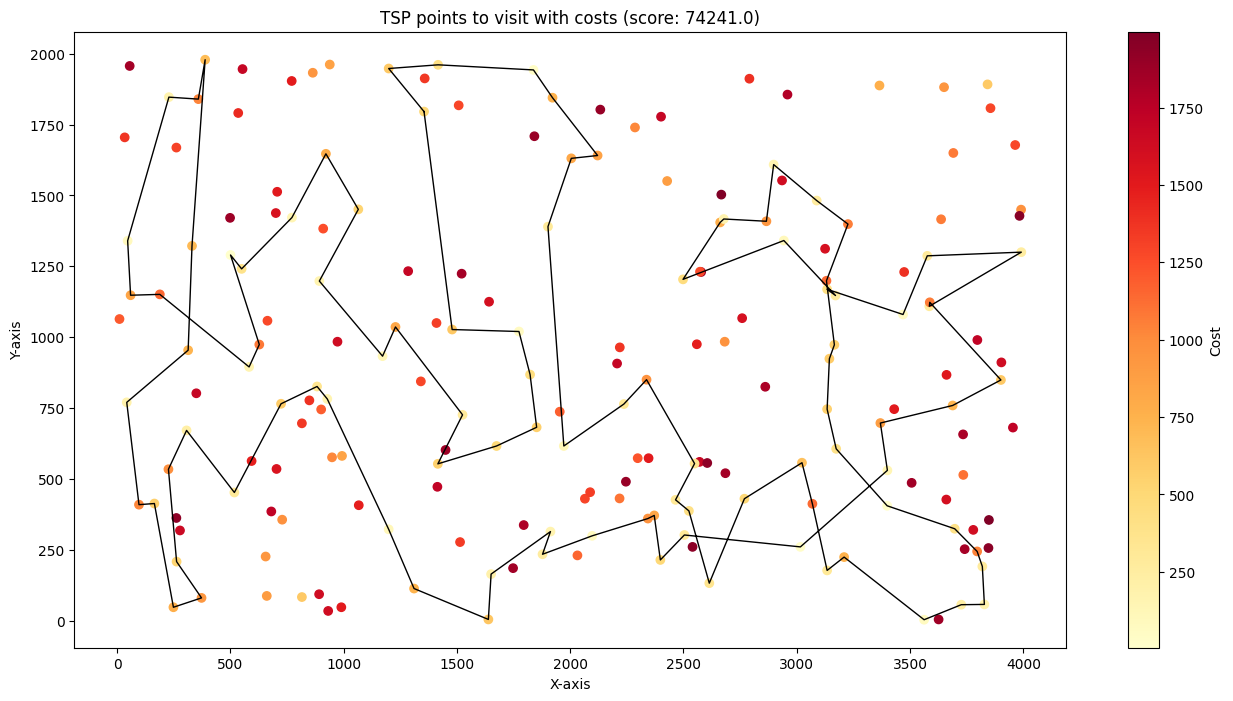

TSPA.csv
RandomSolver
[164, 95, 116, 128, 31, 170, 194, 160, 103, 123, 37, 162, 155, 126, 150, 179, 192, 134, 85, 4, 53, 173, 24, 38, 54, 144, 124, 158, 189, 141, 130, 56, 1, 171, 33, 181, 57, 183, 11, 106, 32, 92, 111, 48, 78, 94, 140, 197, 112, 132, 80, 88, 180, 129, 143, 46, 42, 36, 191, 19, 184, 137, 131, 62, 79, 83, 185, 100, 138, 199, 55, 169, 96, 117, 10, 41, 127, 23, 59, 74, 182, 29, 186, 152, 15, 97, 142, 151, 114, 187, 26, 178, 40, 148, 84, 51, 14, 30, 13, 81]


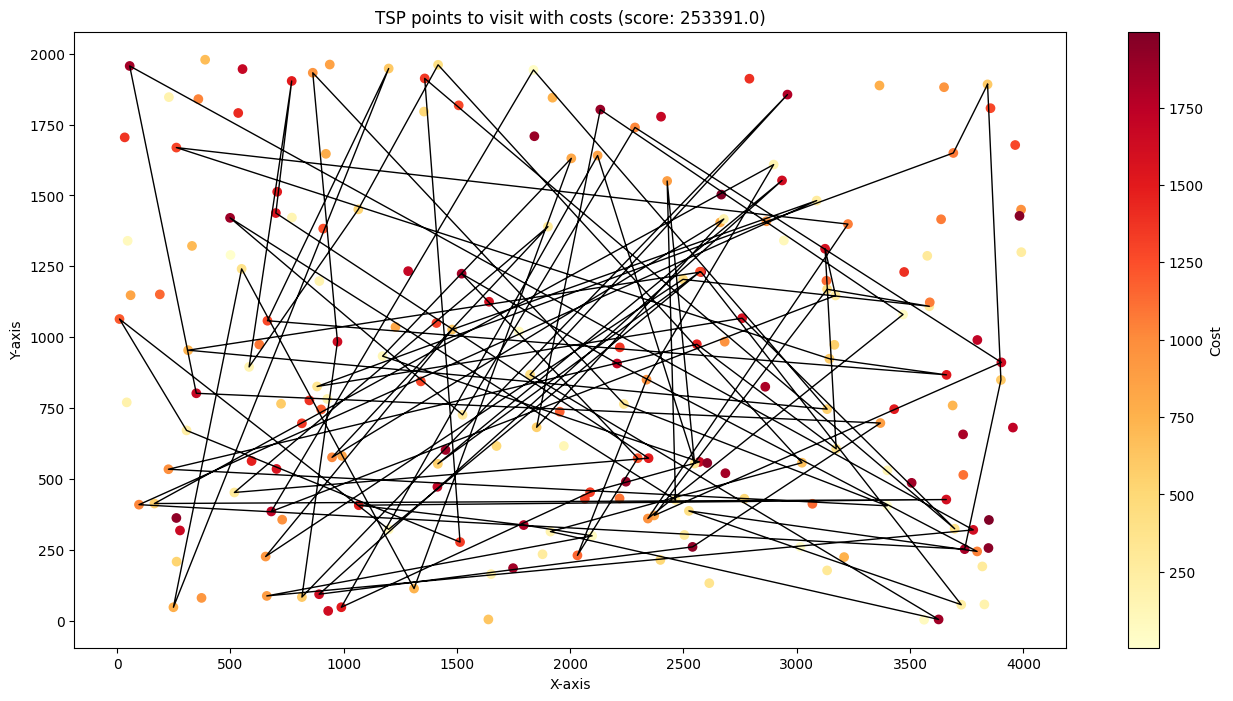

TSPA.csv
RegretGreedyCycle
[0, 46, 198, 115, 96, 42, 43, 77, 149, 59, 118, 109, 141, 66, 176, 80, 79, 63, 94, 12, 111, 128, 148, 137, 76, 89, 83, 114, 64, 73, 132, 144, 102, 49, 178, 14, 21, 7, 58, 71, 27, 90, 39, 8, 119, 174, 81, 98, 17, 157, 38, 31, 13, 113, 175, 16, 78, 25, 44, 120, 82, 129, 2, 125, 97, 100, 121, 136, 53, 158, 154, 6, 135, 194, 127, 29, 126, 112, 4, 190, 177, 104, 30, 48, 160, 34, 103, 146, 195, 159, 142, 199, 69, 108, 67, 36, 140, 93, 117, 143]


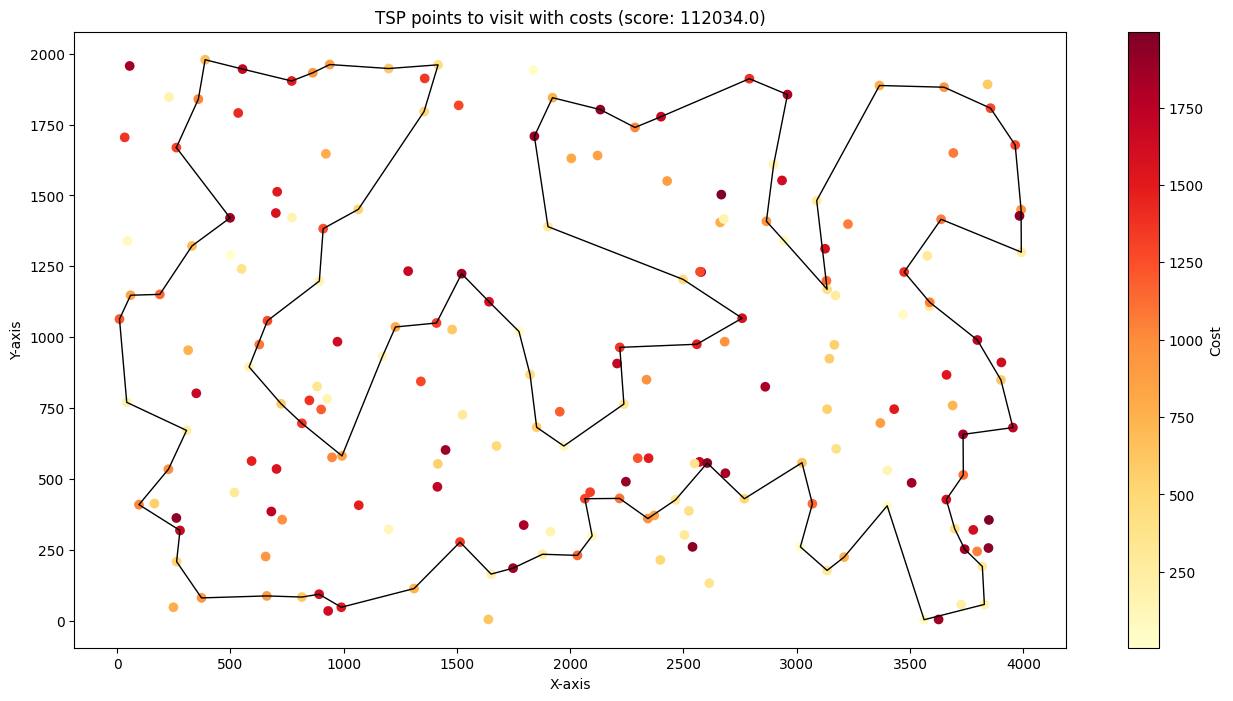

TSPA.csv
WeightedRegretGreedyCycle
[0, 117, 93, 140, 68, 46, 139, 108, 18, 199, 22, 146, 159, 193, 41, 115, 5, 42, 181, 34, 160, 48, 54, 177, 184, 43, 116, 65, 59, 118, 51, 176, 80, 79, 133, 151, 162, 123, 127, 70, 135, 154, 180, 63, 94, 53, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 129, 57, 55, 52, 185, 40, 196, 81, 90, 27, 164, 7, 95, 39, 165, 106, 178, 49, 14, 144, 102, 62, 9, 148, 15, 114, 186, 137, 23, 89, 183, 143]


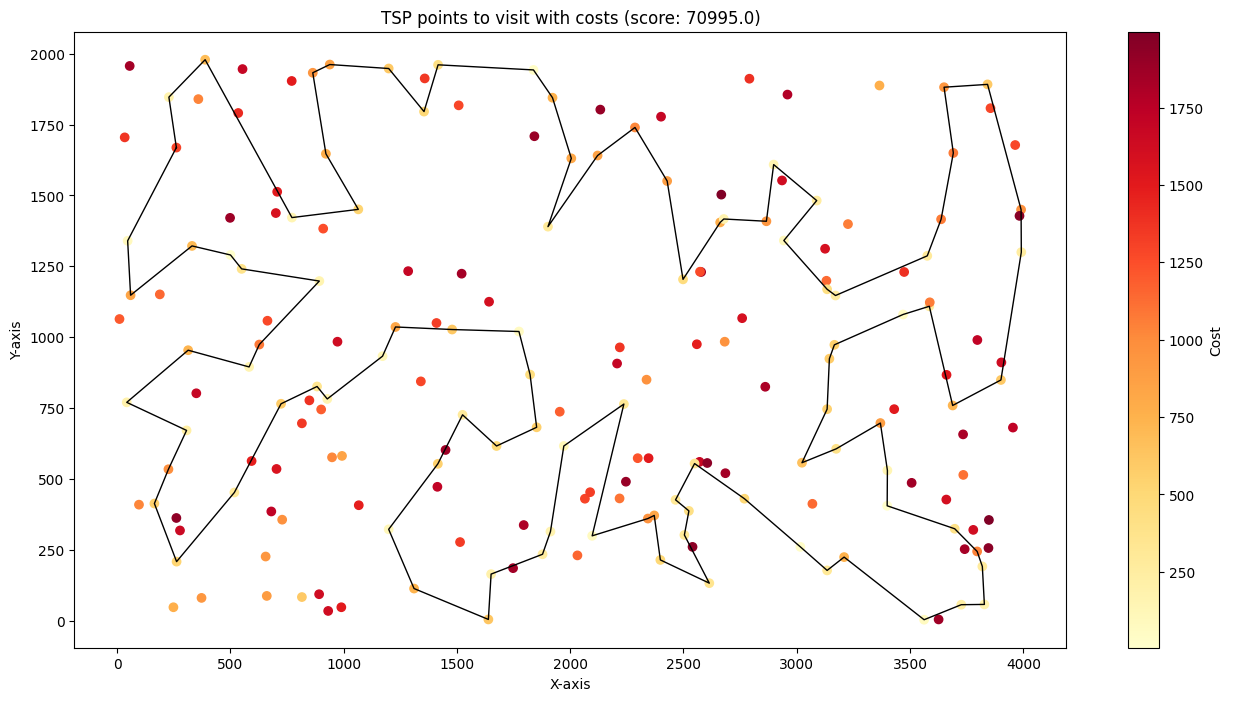

TSPB.csv
GreedyCycle
[0, 111, 144, 56, 8, 82, 87, 21, 77, 81, 153, 163, 176, 86, 95, 128, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140, 28, 20, 60, 148, 47, 94, 66, 130, 99, 185, 179, 166, 194, 113, 103, 89, 127, 165, 187, 97, 141, 91, 61, 36, 78, 175, 142, 45, 5, 177, 25, 104, 138, 182, 139, 168, 195, 145, 15, 3, 70, 161, 13, 132, 169, 188, 6, 147, 191, 90, 178, 10, 133, 122, 100, 107, 40, 63, 135, 131, 121, 51, 98, 118, 74, 134, 43, 11, 49, 33, 160, 29, 109, 35]


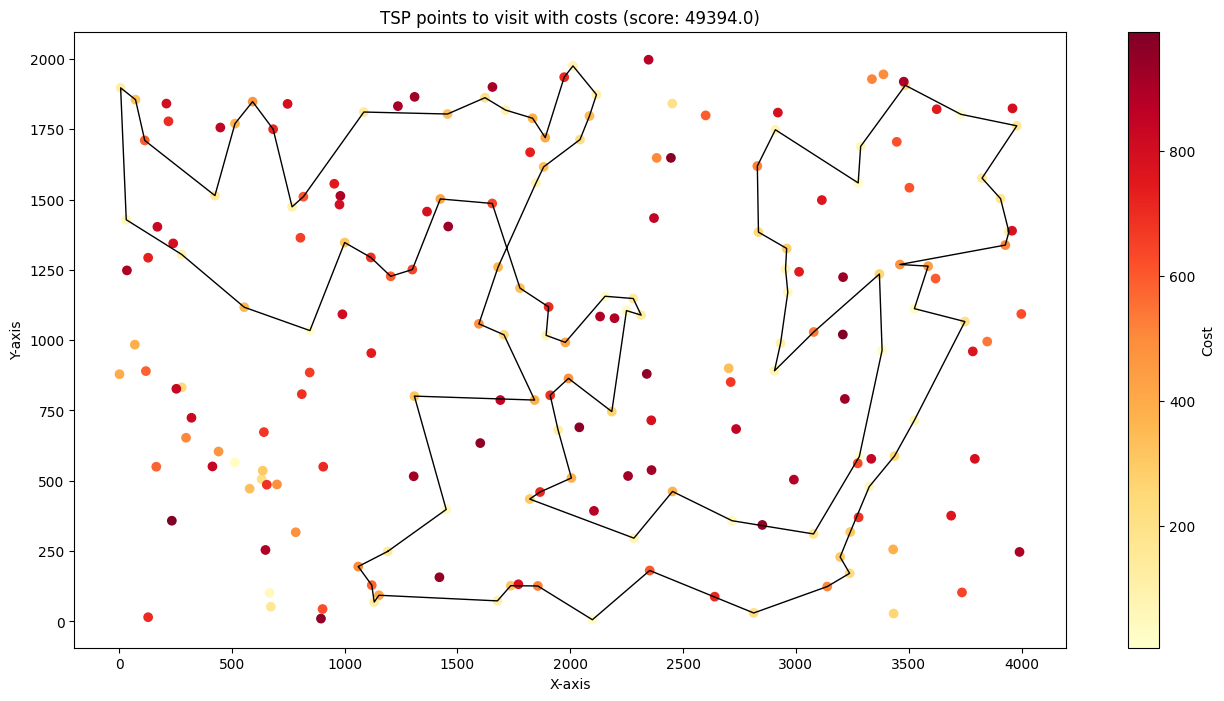

TSPB.csv
NNHead
[0, 29, 109, 35, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 21, 82, 144, 160, 139, 182, 25, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 51, 98, 118, 74, 16, 1, 117, 31, 54, 193, 190, 80, 175, 5, 177, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143]


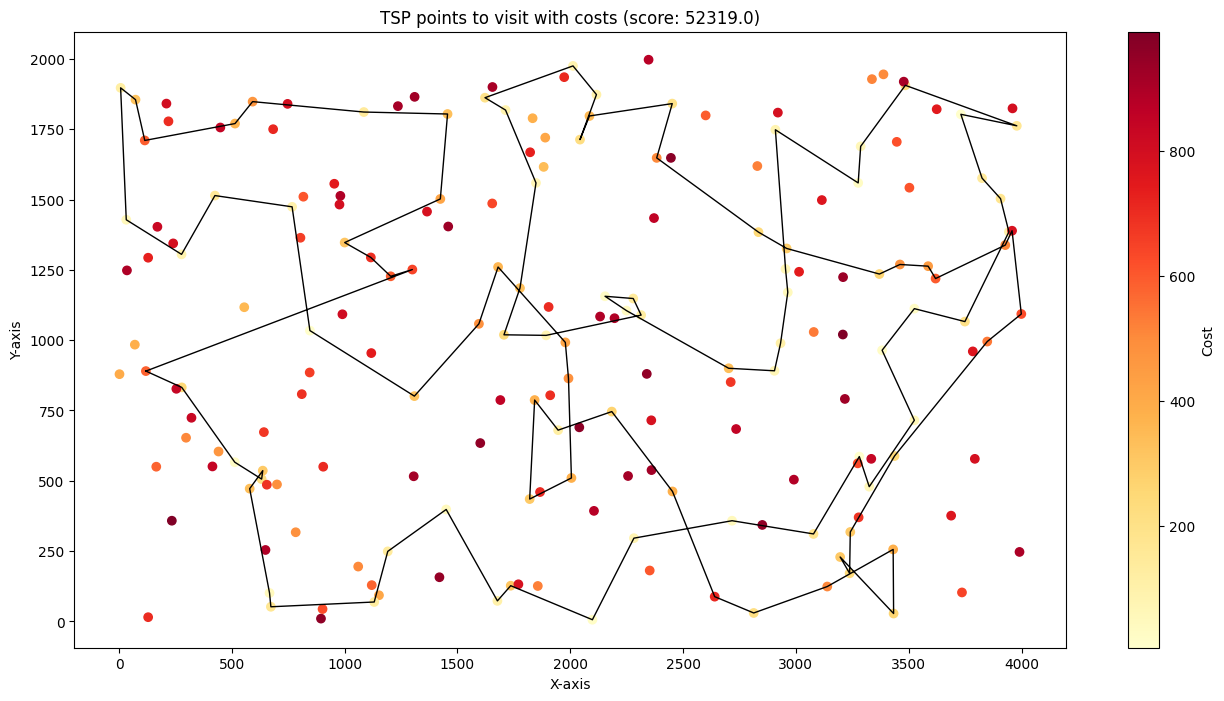

TSPB.csv
NNWhole
[0, 29, 33, 160, 49, 11, 138, 168, 195, 13, 145, 15, 3, 70, 132, 169, 188, 6, 147, 51, 90, 191, 122, 63, 135, 131, 121, 139, 182, 25, 177, 5, 78, 175, 77, 81, 153, 176, 180, 86, 128, 140, 183, 124, 106, 159, 143, 62, 18, 55, 34, 170, 152, 4, 149, 28, 20, 60, 148, 47, 154, 94, 66, 57, 179, 185, 95, 130, 99, 22, 172, 52, 166, 194, 113, 26, 114, 137, 103, 127, 89, 163, 165, 187, 146, 97, 141, 91, 36, 61, 21, 87, 82, 8, 104, 56, 144, 111, 35, 109]


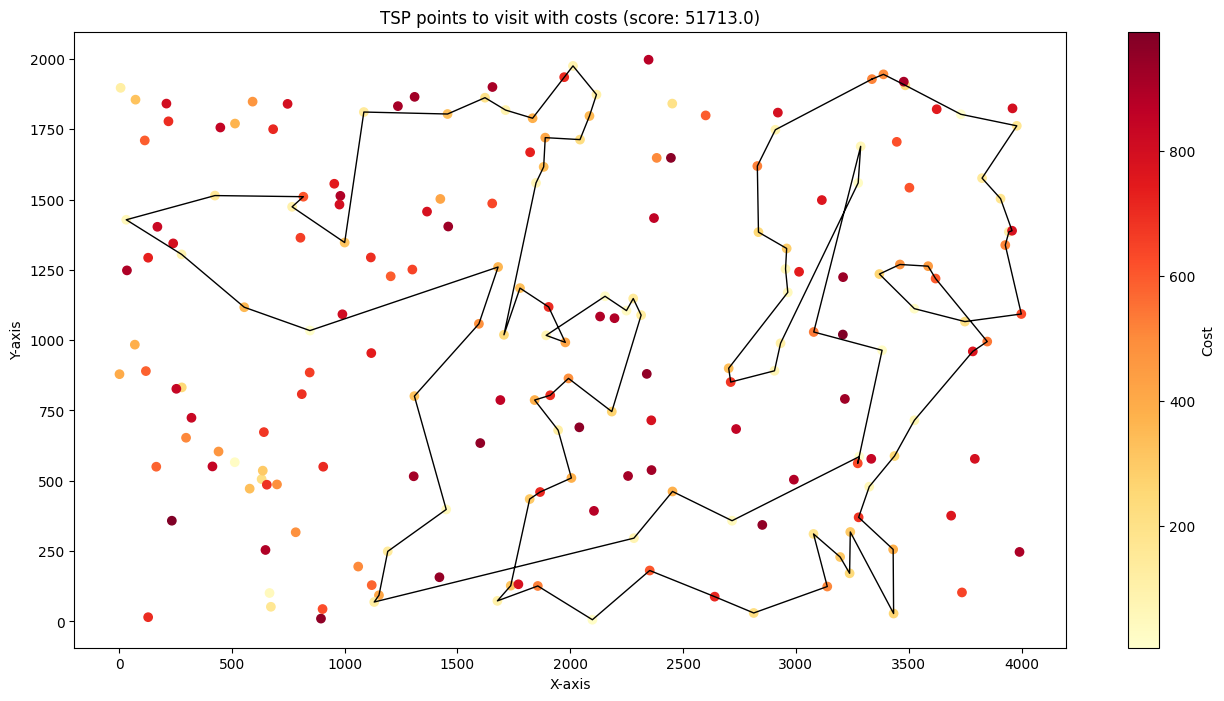

TSPB.csv
RandomSolver
[164, 95, 116, 128, 31, 170, 194, 160, 103, 123, 37, 162, 155, 126, 150, 179, 192, 134, 85, 4, 53, 173, 24, 38, 54, 144, 124, 158, 189, 141, 130, 56, 1, 171, 33, 181, 57, 183, 11, 106, 32, 92, 111, 48, 78, 94, 140, 197, 112, 132, 80, 88, 180, 129, 143, 46, 42, 36, 191, 19, 184, 137, 131, 62, 79, 83, 185, 100, 138, 199, 55, 169, 96, 117, 10, 41, 127, 23, 59, 74, 182, 29, 186, 152, 15, 97, 142, 151, 114, 187, 26, 178, 40, 148, 84, 51, 14, 30, 13, 81]


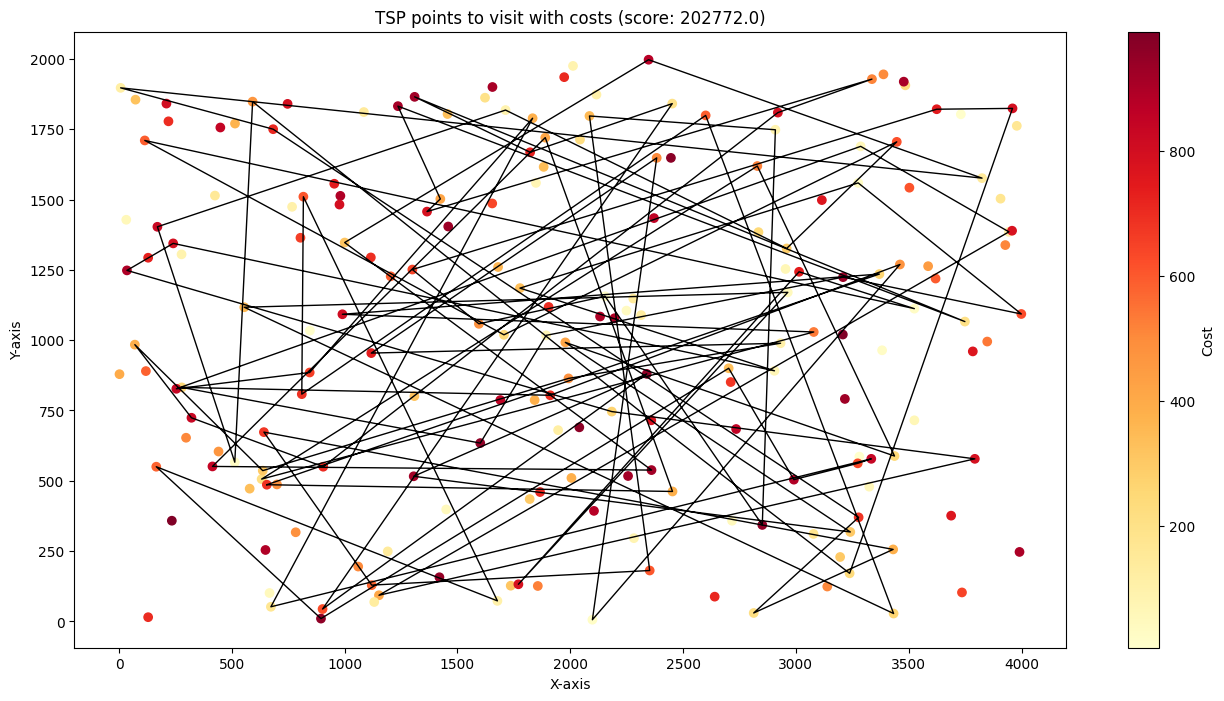

TSPB.csv
RegretGreedyCycle
[0, 29, 160, 49, 11, 138, 182, 74, 118, 98, 51, 125, 131, 121, 116, 158, 25, 123, 177, 171, 157, 104, 8, 21, 91, 36, 7, 5, 45, 162, 190, 105, 136, 73, 193, 117, 198, 24, 197, 27, 92, 102, 96, 100, 72, 133, 10, 115, 147, 192, 150, 6, 134, 43, 168, 13, 145, 15, 3, 84, 155, 184, 53, 170, 34, 18, 62, 128, 64, 86, 95, 174, 140, 199, 28, 59, 20, 60, 47, 66, 22, 179, 172, 48, 76, 93, 75, 137, 114, 103, 165, 187, 146, 97, 77, 58, 50, 14, 41, 37]


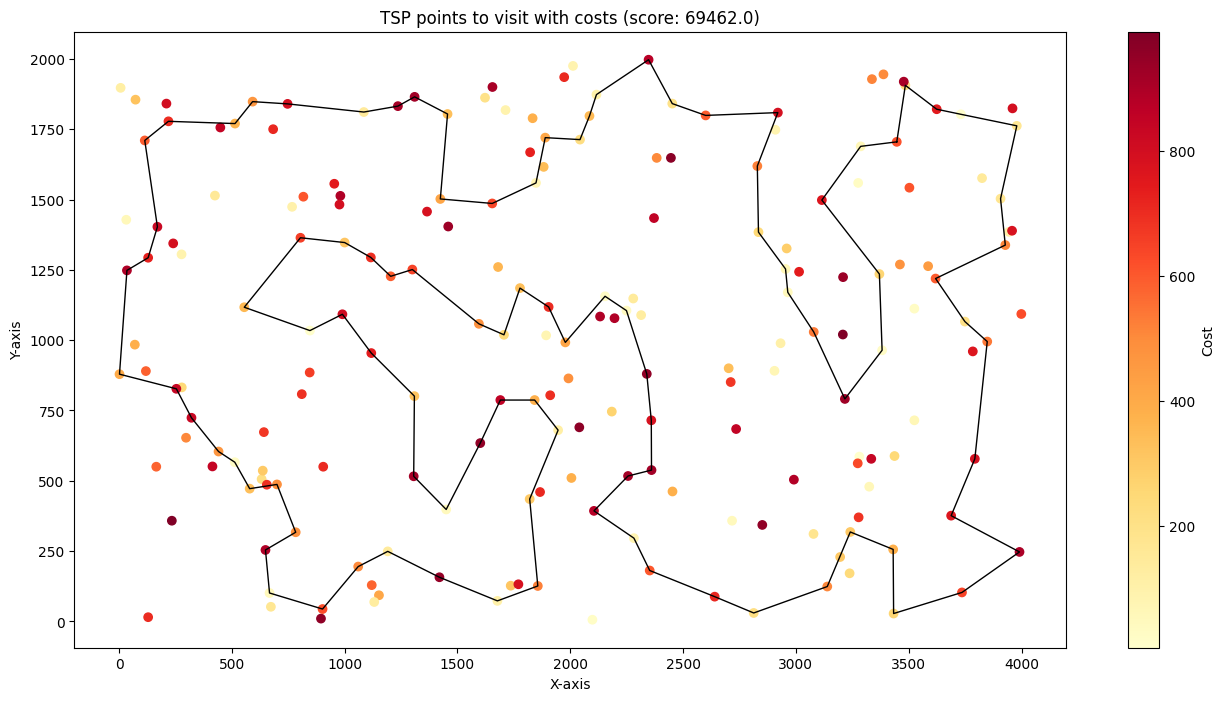

TSPB.csv
WeightedRegretGreedyCycle
[0, 109, 35, 143, 106, 124, 62, 18, 34, 55, 128, 86, 176, 180, 113, 194, 166, 172, 179, 185, 22, 99, 130, 95, 183, 199, 148, 47, 94, 60, 20, 28, 149, 4, 140, 152, 170, 184, 155, 3, 70, 15, 145, 195, 168, 13, 132, 169, 188, 6, 147, 71, 191, 90, 125, 51, 121, 131, 122, 135, 63, 38, 27, 16, 1, 156, 198, 117, 193, 54, 31, 73, 136, 190, 80, 162, 175, 78, 142, 45, 5, 177, 36, 61, 91, 141, 97, 77, 21, 82, 111, 8, 104, 138, 182, 139, 11, 33, 160, 29]


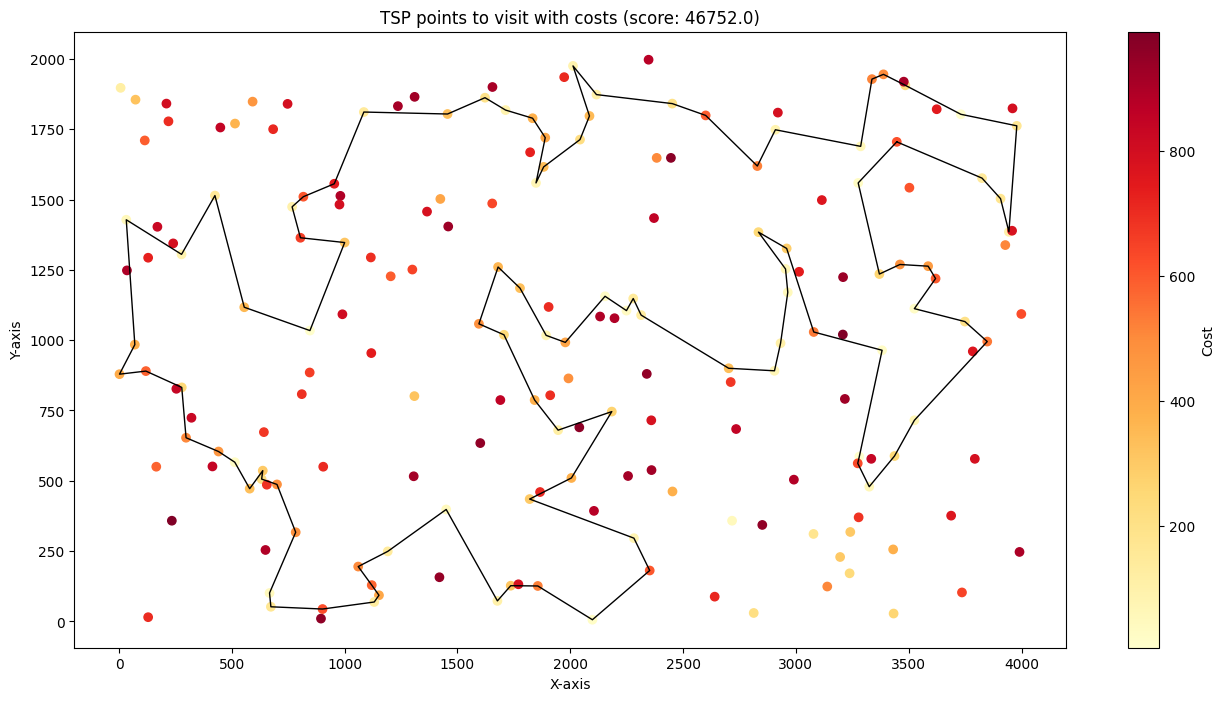

In [16]:
for row in best.itertuples():
    print(row.filename)
    print(row.solver)
    instance = instance_a
    if row.filename == 'TSPB.csv':
        instance = instance_b
    print(rotate_to_zero(eval(row.solution)))
    instance.visualize(eval(row.solution))
    

## Information whether the best solutions have been checked with the solution checker.
Yes solutions have been checked with solution checker

## (Link to) the source code
https://github.com/BbqGamer/tsp

## Conclusions
Greedy methods are nice in the sense that they are easy to implement and to run, in particular NNHead method was very fast (it works in linear time), even if the results weren't too good they were significantly better than random solution, however the solutions from NNHead result in a lot of big jumps which is quite unoptimal. NNWhole results in slightly better results, but probably not enough to justify its higher complexity $O(n^2)$. The best Greedy algorithm out of three tested was GreedyCycle, it resulted in solutions that were more compressed, you can see a step improvement in the results however for the price of the complexity, this algorithm works in $O(n^3)$